<a href="https://colab.research.google.com/github/Sufiyanyoonus/Project/blob/main/Predicting_the_influence_of_the_drugs_and_alcohol_in_crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Title:
#Predicting the Influence of Drugs and Alcohol on Crime Incidents

#Project Information:
##Dataset Source: [Source of  crime dataset (e.g., "https://data.world/cdc2019/crime/workspace/file?filename=police-arrests-made.csv)]

##Objective: The goal of this project is to analyze and predict the influence of drugs or alcohol in crime incidents using various machine learning techniques. Specifically, the project aims to understand how certain features such as the arrestee's age, weapon present, and the type of arrest correlate with the presence of drugs or alcohol in crime incidents.

#Tools and Technologies:

##Python (Programming Language)
###Libraries Used:
###Pandas
###Scikit-learn
###Matplotlib/Seaborn (for visualization)
###NumPy

##ML Techniques:
###Data Preprocessing
###Feature Selection
###Classification (or Regression based on the target variable)
##Dataset Description:

##Number of Rows: 16000
##Number of Columns: 12

##Columns:

###Incident Id
###Date of Arrest
###Time of Arrest
###Primary Charge
###Address
###Arrestee’s Age
###Arrestee’s Race
###Arrestee’s Gender
###Arrestee’s Ethnicity
###Type of Arrest
###Drugs or Alcohol Present
###Weapon Present

#Problem Statement:
##Predict whether drugs or alcohol are present during a crime incident based on features such as arrestee's age, gender, race, arrest type, and weapon presence.

# Project Dataset:
## The best dataset of all over world with 16 k + crimes all over the world an d i think this is the best data set
#Project Approach:

##Data Preprocessing: Handling missing values, encoding categorical features, scaling numerical data, and identifying outliers.

##Exploratory Data Analysis (EDA): Visualizing distributions and relationships between features.

##Feature Selection: Selecting important features using techniques like SelectKBest

##Model Building: Using machine learning models to predict the presence of drugs or alcohol in crime incidents.

#Expected Outcome:

##Identification of key features that influence the presence of drugs or alcohol in crimes.
#Development of a predictive model for identifying incidents involving drugs or alcohol.


#Data Preproicessing

##Load the Dataset

In [1]:
# Mounting the file from drive

file_path='/content/drive/MyDrive/police-arrests-made.csv'
import pandas as pd
df=pd.read_csv(file_path,sep=';')

# print the head of the data
print(df.head)



<bound method NDFrame.head of        Incident Id Date of Arrest Time of Arrest               Primary Charge  \
0            24071     2010-01-01           0:36          UNDERAGE POSSESSION   
1            24078     2010-01-01           4:30          UNDERAGE POSSESSION   
2            24080     2010-01-01           7:52         FAIL TO APPEAR/COMPL   
3            24082     2010-01-01          15:42             RESISTING ARREST   
4            24083     2010-01-01          16:13          BURGLARY-1ST DEGREE   
...            ...            ...            ...                          ...   
16035        40259     2019-06-26           4:28         FAIL TO APPEAR/COMPL   
16036        40264     2019-06-27          21:01                     STALKING   
16037        40276     2019-06-28          21:30  GIVE/SELL MALT BEV TO MINOR   
16038        40271     2019-06-29          11:01               OPEN CONTAINER   
16039        40281     2019-06-29          19:22               OPEN CONTAINER  

##EDA

In [2]:
df.columns # columns


Index(['Incident Id', 'Date of Arrest', 'Time of Arrest', 'Primary Charge',
       'Address', 'Arrestee's Age', 'Arrestee's Race', 'Arrestee's Gender',
       'Arrestee's Ethnicity', 'Type of Arrest', 'Drugs or Alcohol Present',
       'Weapon Present'],
      dtype='object')

In [3]:
df.info() # info shows all about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16040 entries, 0 to 16039
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Incident Id               16040 non-null  int64  
 1   Date of Arrest            16040 non-null  object 
 2   Time of Arrest            16040 non-null  object 
 3   Primary Charge            16040 non-null  object 
 4   Address                   16040 non-null  object 
 5   Arrestee's Age            15081 non-null  float64
 6   Arrestee's Race           15080 non-null  object 
 7   Arrestee's Gender         15080 non-null  object 
 8   Arrestee's Ethnicity      11135 non-null  object 
 9   Type of Arrest            16039 non-null  object 
 10  Drugs or Alcohol Present  15693 non-null  object 
 11  Weapon Present            15971 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.5+ MB


In [4]:
df.describe() # stastical value of the  numerical features

,Incident Id,Arrestee's Age
count,16040.000000,15081.000000
mean,32196.500686,34.443870
std,4679.334537,13.817676
min,24065.000000,18.000000
25%,28143.750000,22.000000
50%,32212.500000,30.000000
75%,36245.250000,46.000000
max,40364.000000,87.000000


##Handling the null values

In [5]:
df.isnull().sum() # cheking the null values

,0
Incident Id,0
Date of Arrest,0
Time of Arrest,0
Primary Charge,0
Address,0
Arrestee's Age,959
Arrestee's Race,960
Arrestee's Gender,960
Arrestee's Ethnicity,4905
Type of Arrest,1


In [6]:
# handling the null values

data =df.copy() # copy of the dataset



In [7]:
data["Arrestee's Age"]=data["Arrestee's Age"].fillna(data["Arrestee's Age"].median()) # replacing the age with median
print(data["Arrestee's Age"])

0        30.0
1        18.0
2        18.0
3        27.0
4        48.0
         ... 
16035    46.0
16036    19.0
16037    66.0
16038    59.0
16039    37.0
Name: Arrestee's Age, Length: 16040, dtype: float64


In [8]:
data["Arrestee's Gender"].fillna(data["Arrestee's Gender"].mode()[0]) # Replacing the gender with mode


,Arrestee's Gender
0,M
1,M
2,M
3,M
4,M
...,...
16035,M
16036,M
16037,M
16038,M


In [9]:
data["Arrestee's Ethnicity"].fillna("Unknown") # replacing with the null values Unlkknown

,Arrestee's Ethnicity
0,Unknown
1,N
2,Unknown
3,N
4,H
...,...
16035,N
16036,H
16037,N
16038,N


In [10]:
data["Drugs or Alcohol Present"].fillna("Unknown") # due to it is a target variable it wise to not to make any assumptions


,Drugs or Alcohol Present
0,Y
1,Y
2,N
3,U
4,Y
...,...
16035,Y
16036,N
16037,N
16038,Y


In [11]:
data['Type of Arrest'].fillna(data['Type of Arrest'].mode()[0]) # using mode of the type of arrest


,Type of Arrest
0,SUMMONED/CITED
1,SUMMONED/CITED
2,TAKEN INTO CUSTODY (WARRANT/LP)
3,ON VIEW
4,TAKEN INTO CUSTODY (WARRANT/LP)
...,...
16035,TAKEN INTO CUSTODY (WARRANT/LP)
16036,TAKEN INTO CUSTODY (WARRANT/LP)
16037,SUMMONED/CITED
16038,SUMMONED/CITED


In [12]:
data["Weapon Present"].fillna(data["Weapon Present"].mode())

,Weapon Present
0,UNARMED
1,UNARMED
2,UNARMED
3,UNARMED
4,UNARMED
...,...
16035,UNARMED
16036,UNARMED
16037,UNARMED
16038,UNARMED


In [13]:
data["Arrestee's Race"].fillna('Unkown')

,Arrestee's Race
0,Unkown
1,W
2,W
3,W
4,A
...,...
16035,B
16036,W
16037,W
16038,W


In [14]:
data.isnull().sum() # Cheking the null values after handling the null values

,0
Incident Id,0
Date of Arrest,0
Time of Arrest,0
Primary Charge,0
Address,0
Arrestee's Age,0
Arrestee's Race,960
Arrestee's Gender,960
Arrestee's Ethnicity,4905
Type of Arrest,1


##Handling the duplicates

In [15]:
data.duplicated().sum() # There are no duplicated values

0

##Handling outliers

<Figure size 1000x900 with 0 Axes>

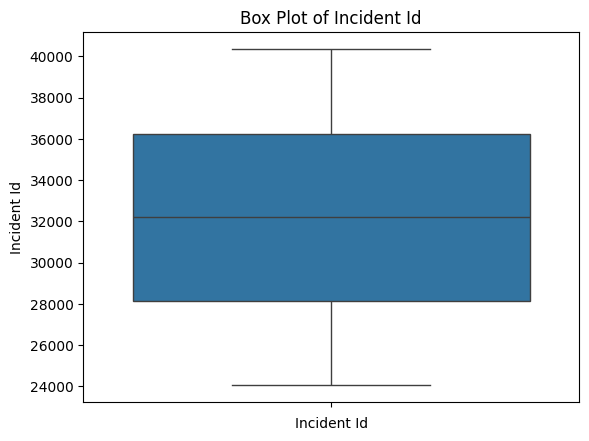

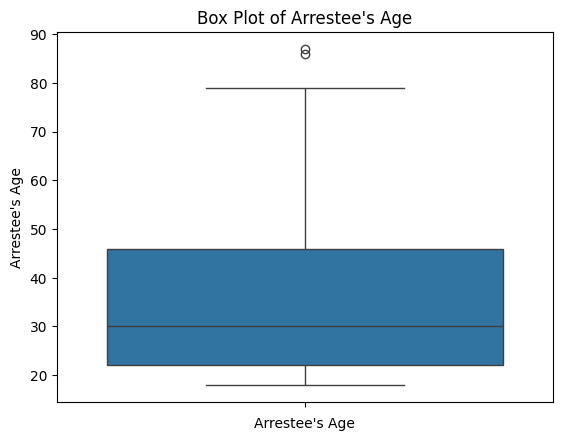

In [16]:
import numpy as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

num_columns=data.select_dtypes(include=['int64','float64']).columns.tolist()

plt.figure(figsize=(10,9))
for column in num_columns:
    plt.figure()  # Create a new figure for each box plot
    sns.boxplot(y=df[column])  # Create a box plot for the current column
    plt.title(f'Box Plot of {column}')  # Title for the current box plot
    plt.xlabel(column)  # Label for the x-axis
    plt.show()  # Display the box plot

###   ZSCORE and IQR method

In [17]:
num_col=data.select_dtypes(include=['int64','float64']).columns.tolist()

In [18]:
print(num_col)


['Incident Id', "Arrestee's Age"]


In [19]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Assuming 'data' is your DataFrame
# Selecting the numerical columns
num_col = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(data[num_col]))  # Apply zscore to the numerical columns

# Define the threshold for outliers (commonly ±3)
threshold = 3

# Identify outliers
outliers_z = (z_scores > threshold)  # Identify outliers by checking if z-score exceeds the th

for col in num_col:
  print(f'z score of {col}')
  print(outliers_z.sum())


z score of Incident Id
Incident Id        0
Arrestee's Age    10
dtype: int64
z score of Arrestee's Age
Incident Id        0
Arrestee's Age    10
dtype: int64


###IQR

In [20]:
for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Column: {col}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Identify outliers
    outliers_iqr = (data[col] < lower_bound) | (data[col] > upper_bound)

    print(f"Outliers found: {outliers_iqr.sum()}")




Column: Incident Id
Q1: 28143.75, Q3: 36245.25, IQR: 8101.5
Lower Bound: 15991.5, Upper Bound: 48397.5
Outliers found: 0
Column: Arrestee's Age
Q1: 23.0, Q3: 45.0, IQR: 22.0
Lower Bound: -10.0, Upper Bound: 78.0
Outliers found: 5


## There are no ouytliers in this data aftering cheking boboth visually and statistacaly


##Data transformation

###Encoding the categorical values

In [21]:
from sklearn.preprocessing import LabelEncoder # import label encoder fdrom necessary librariers
categorical_col=data.select_dtypes(include=['object']).columns.tolist() # picking only categorical columns

label_encoder=LabelEncoder() # create object

for column in categorical_col:
  data[column]=label_encoder.fit_transform(df[column]) # fit_transform the data using label encoder

print(data.head)

<bound method NDFrame.head of        Incident Id  Date of Arrest  Time of Arrest  Primary Charge  Address  \
0            24071               0              36            1125     5166   
1            24078               0            1110            1125     3419   
2            24080               0            1308             394     1012   
3            24082               0             402            1000      831   
4            24083               0             433             174     3506   
...            ...             ...             ...             ...      ...   
16035        40259            3357            1108             394     1849   
16036        40264            3358             781            1095     1231   
16037        40276            3359             810             572     2184   
16038        40271            3360             121             782      253   
16039        40281            3360             622             782      253   

       Arrestee's Age

###Scaling

In [22]:
from sklearn.preprocessing import StandardScaler # import neccessary librarirs

scaler=StandardScaler()
for column in categorical_col: # loop all categorical columns
  data[column]=scaler.fit_transform(data[[column]])


print(data.head()) # print



   Incident Id  Date of Arrest  Time of Arrest  Primary Charge   Address  \
0        24071       -1.674485       -1.755632        1.733914  1.534657   
1        24078       -1.674485        1.174381        1.733914  0.488707   
2        24080       -1.674485        1.714551       -0.485917 -0.952394   
3        24082       -1.674485       -0.757136        1.354326 -1.060760   
4        24083       -1.674485       -0.672564       -1.153992  0.540794   

   Arrestee's Age  Arrestee's Race  Arrestee's Gender  Arrestee's Ethnicity  \
0            30.0         1.300567           2.350624              1.463555   
1            18.0         0.913979           0.261065             -0.560886   
2            18.0         0.913979           0.261065              1.463555   
3            27.0         0.913979           0.261065             -0.560886   
4            48.0        -1.405554           0.261065             -1.573107   

   Type of Arrest  Drugs or Alcohol Present  Weapon Present  
0     

#Data Visualization

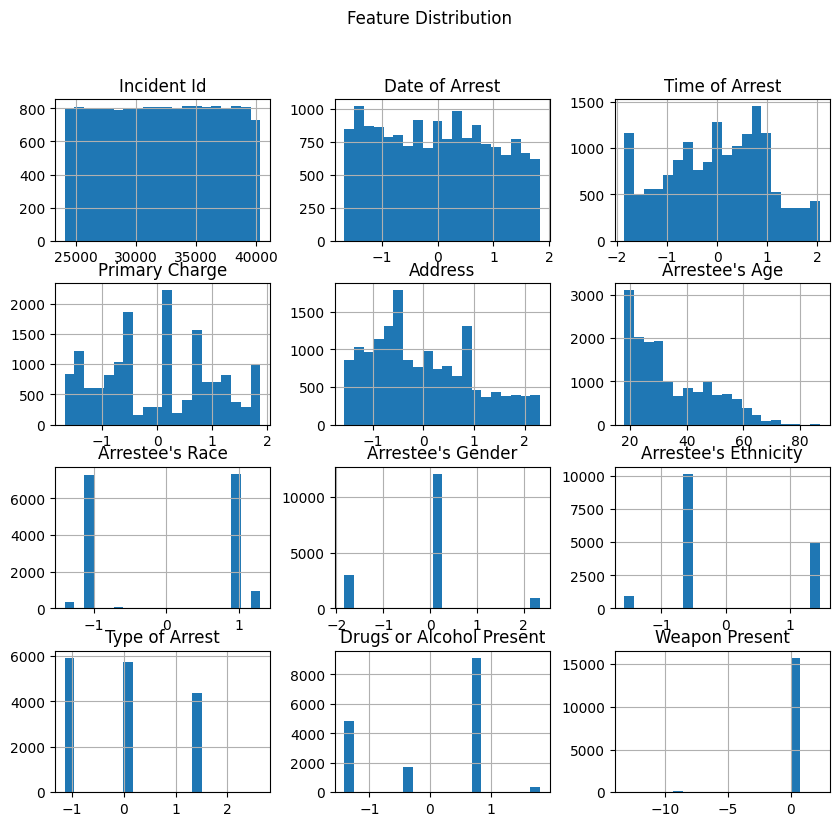

In [23]:
data.hist(bins=20,figsize=(10,9))
plt.suptitle('Feature Distribution')
plt.show()

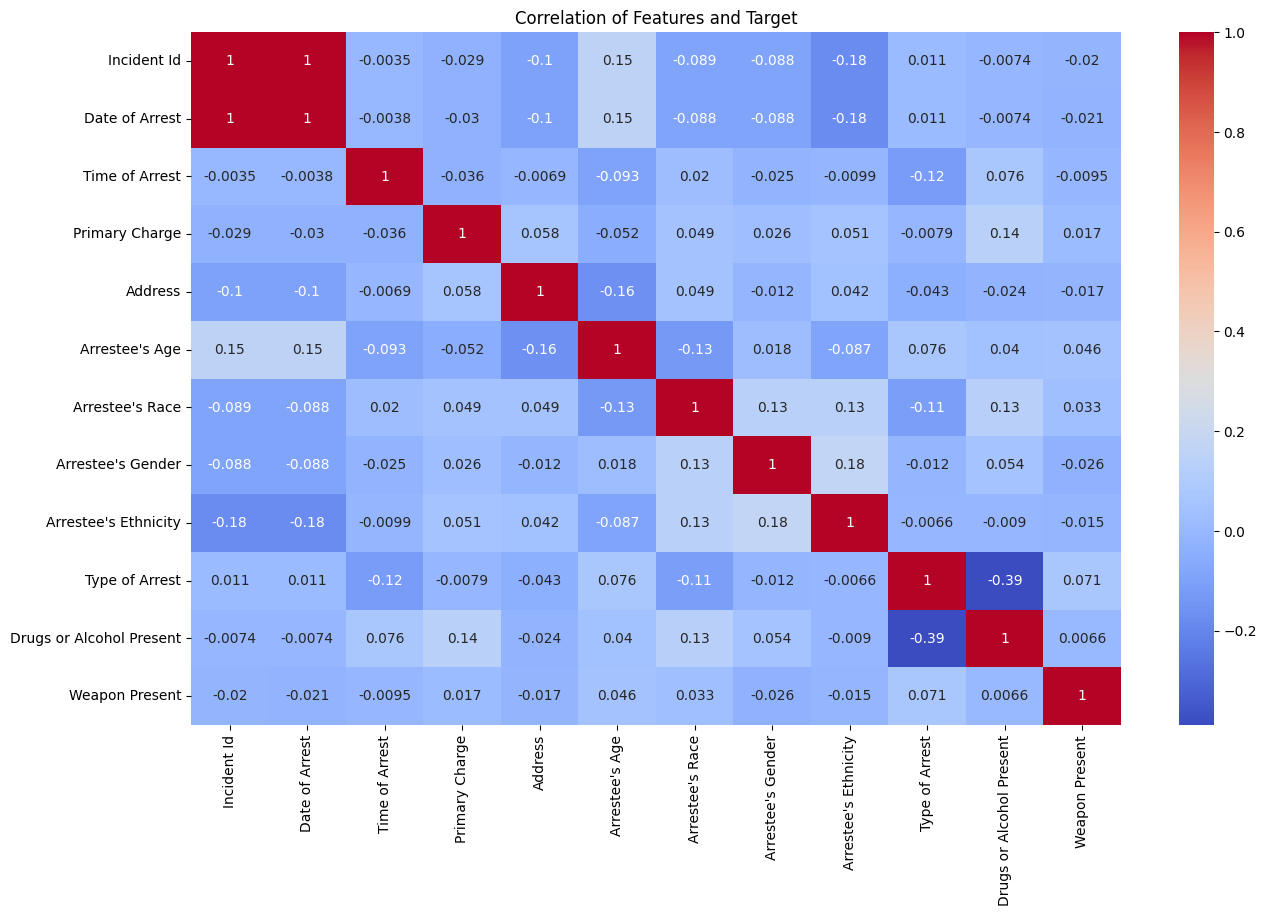

In [24]:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation of Features and Target")
plt.show()

###weapon   strong positive correleation with drugs or alcohols present which is implies that drugs makes a big influecne on weapon then gender is positive correlation and Time of arrest is also positcly correlation type of arrest is neagtive relation

###scatterplot of target and each Feature

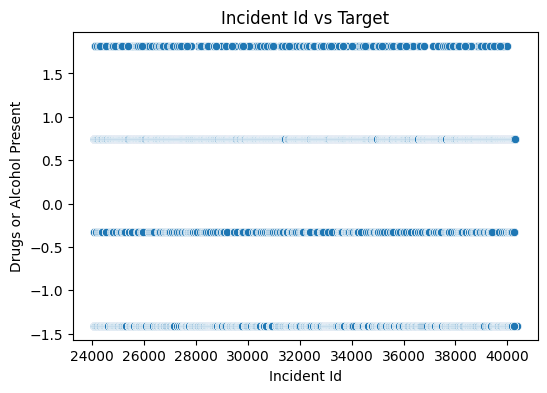

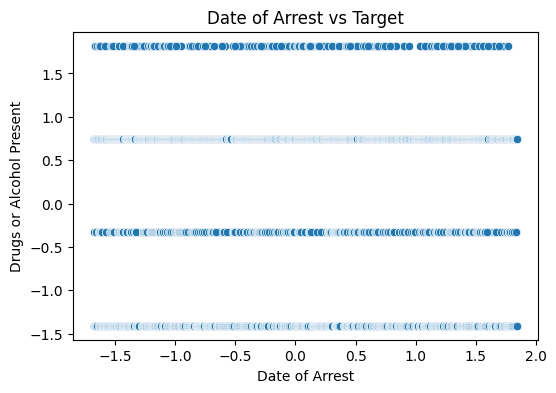

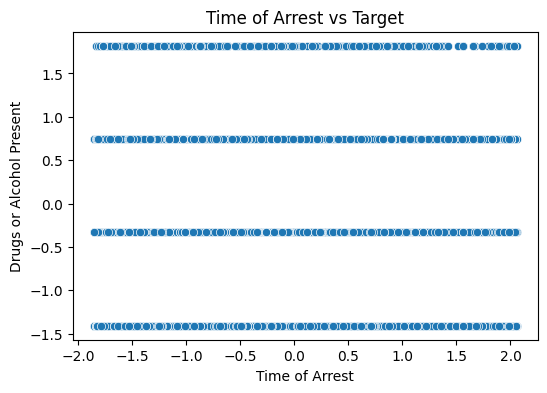

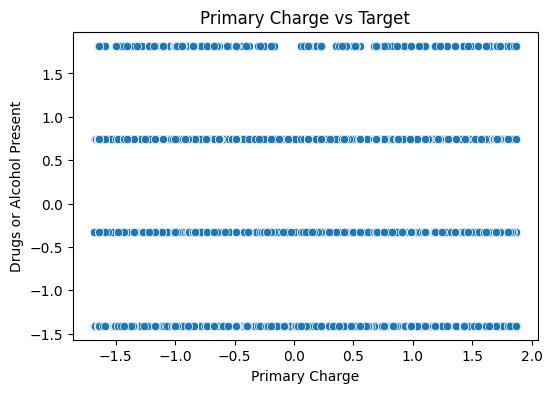

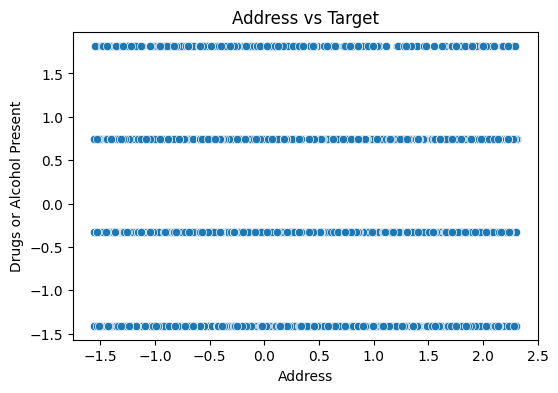

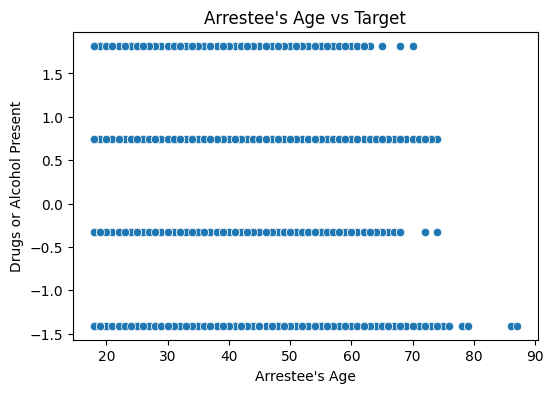

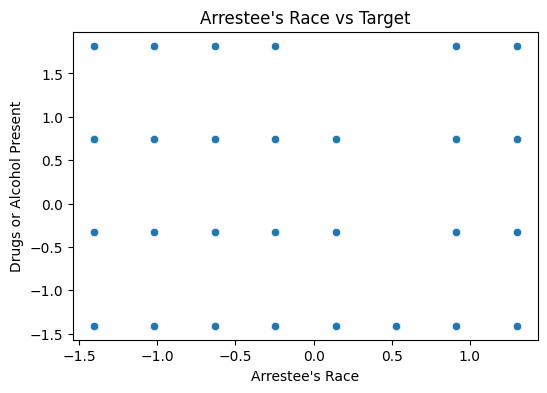

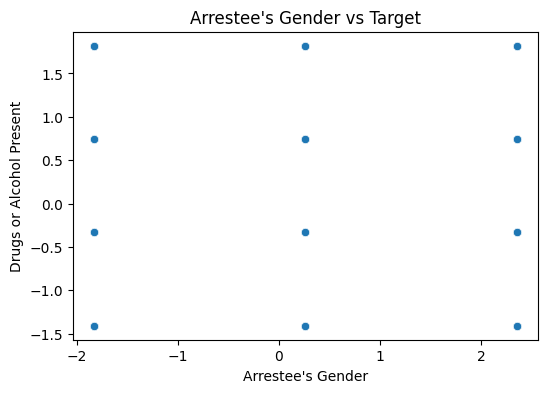

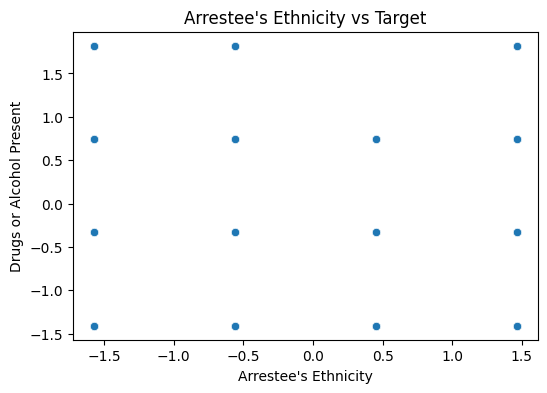

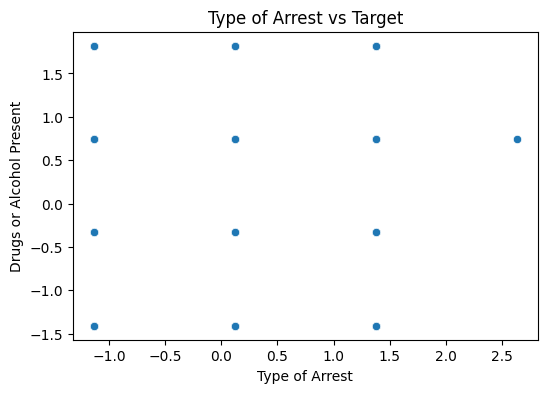

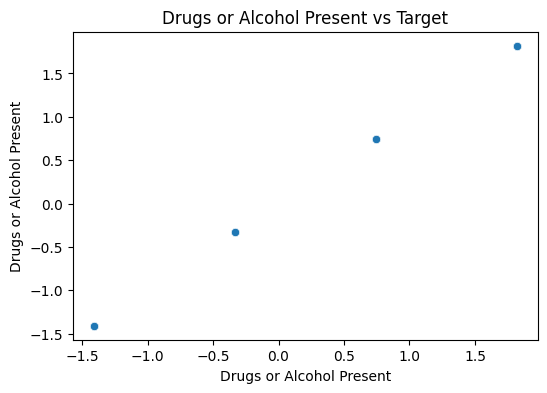

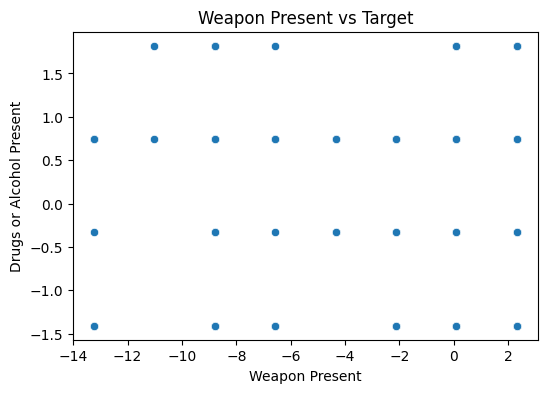

In [25]:
# Scatter plots of features vs target to visualize relationships
for feature in data:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=data["Drugs or Alcohol Present"])
    plt.title(f'{feature} vs Target')
    plt.show()

###Histplot of target vs Feature

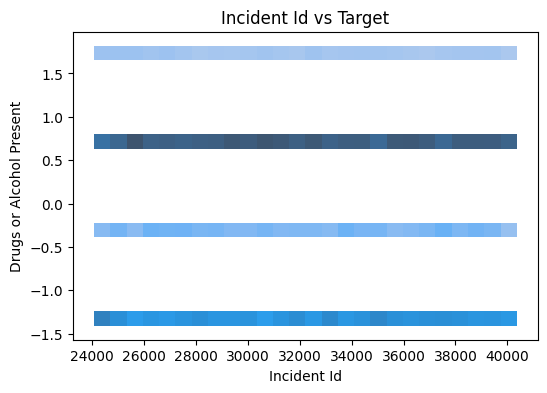

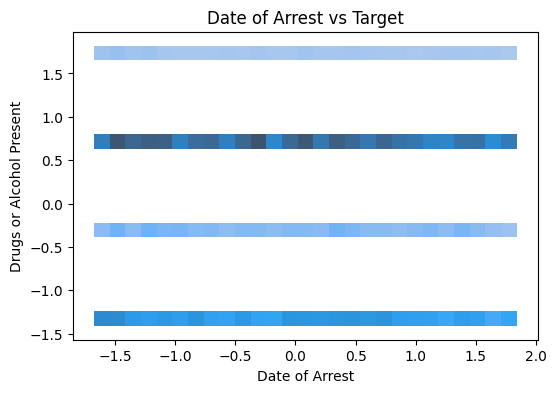

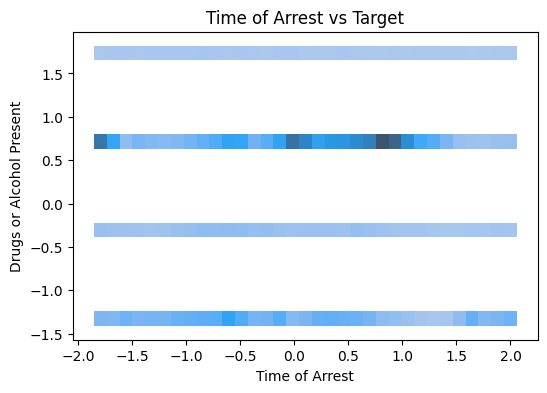

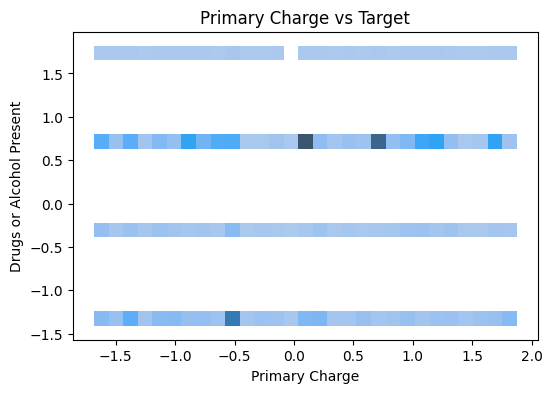

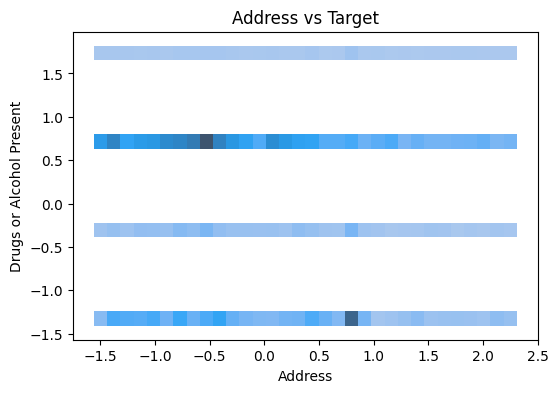

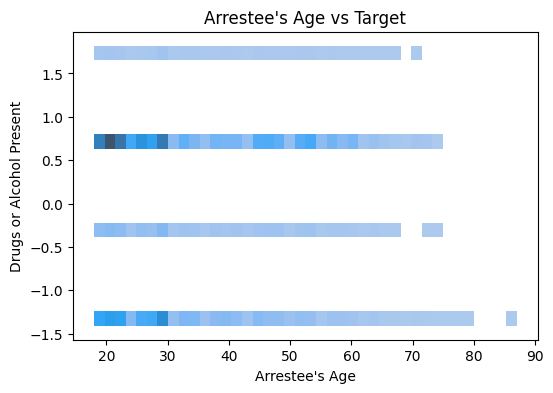

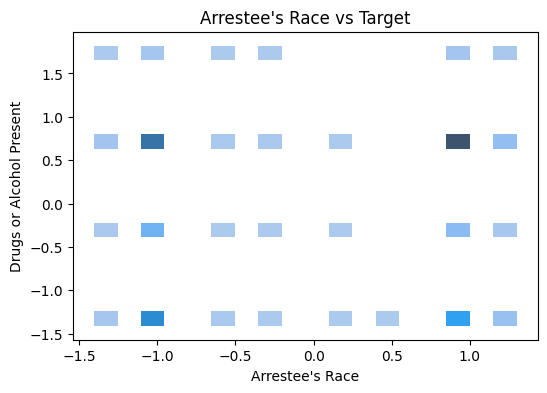

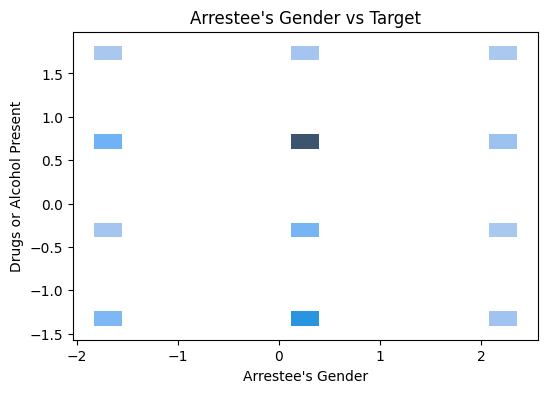

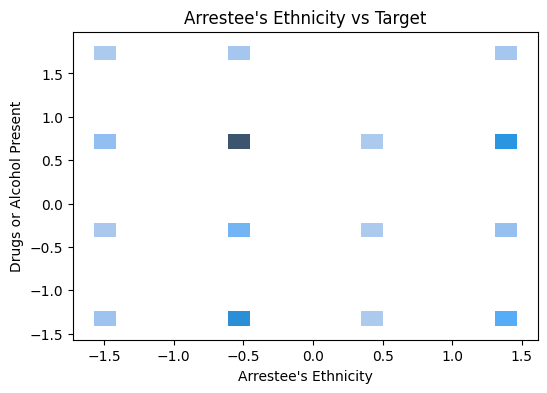

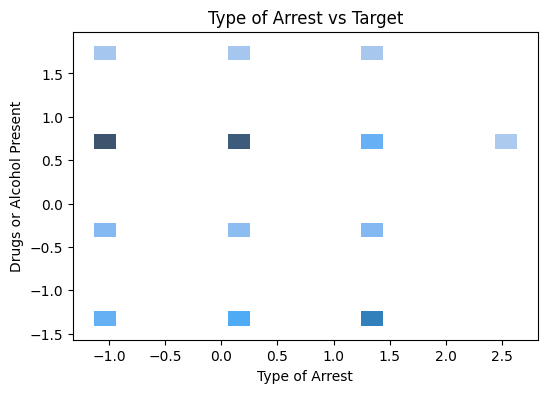

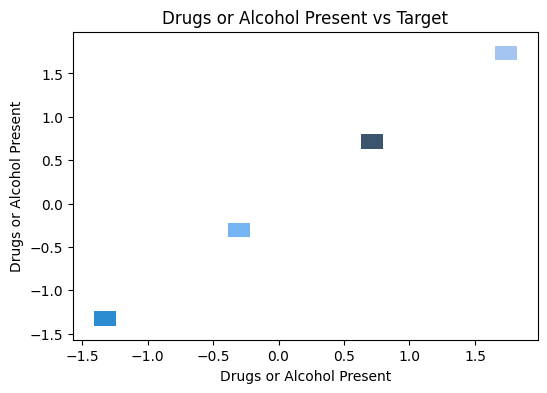

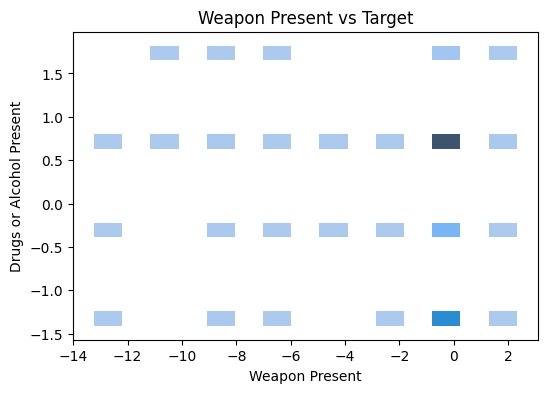

In [26]:
# Scatter plots of features vs target to visualize relationships
for feature in data:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=data[feature], y=data["Drugs or Alcohol Present"])
    plt.title(f'{feature} vs Target')
    plt.show()

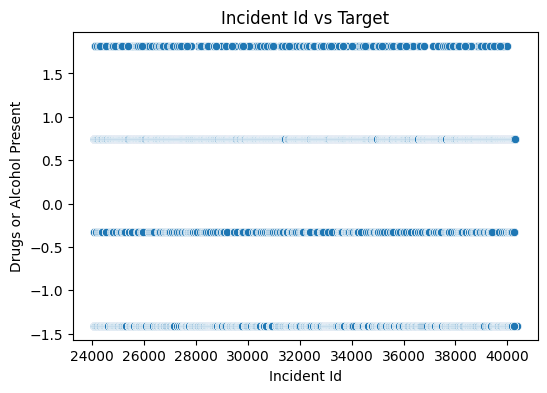

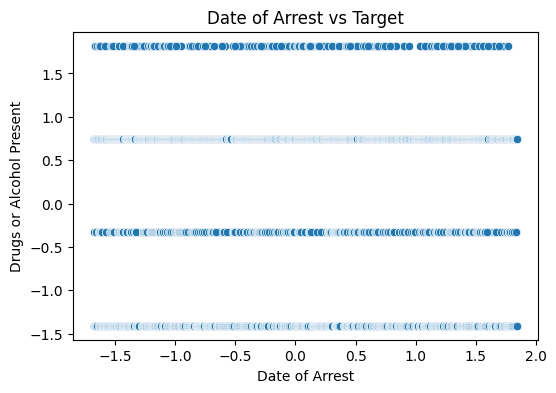

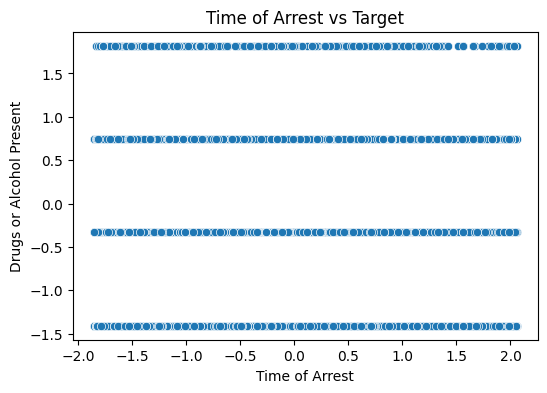

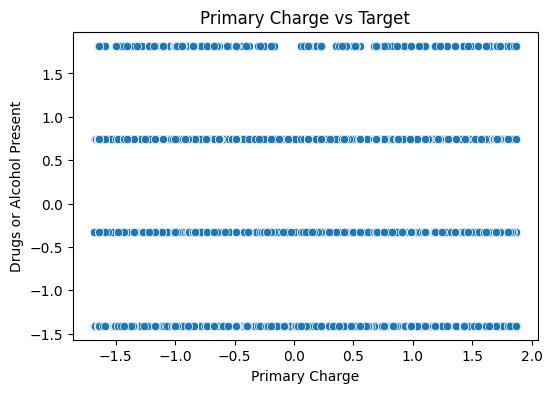

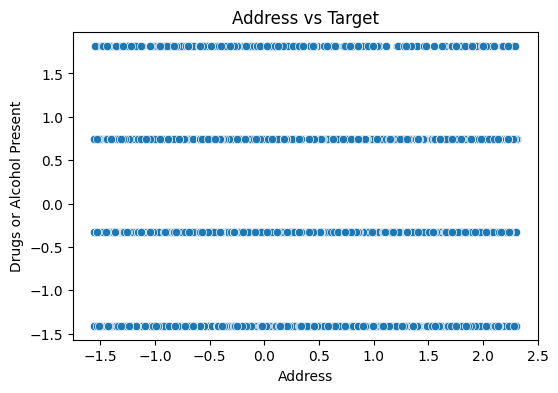

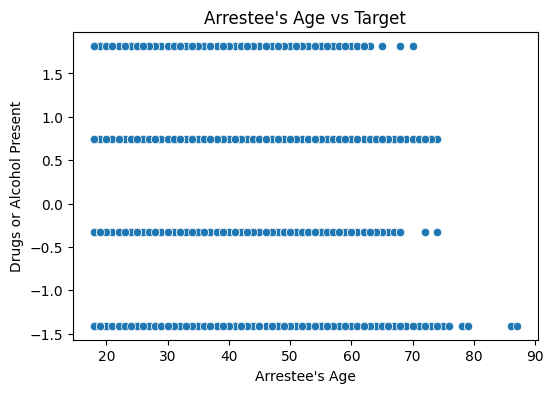

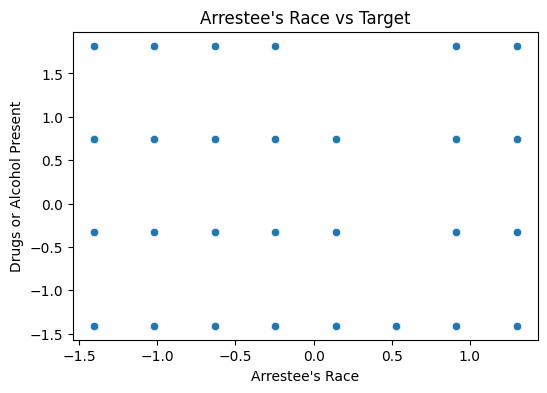

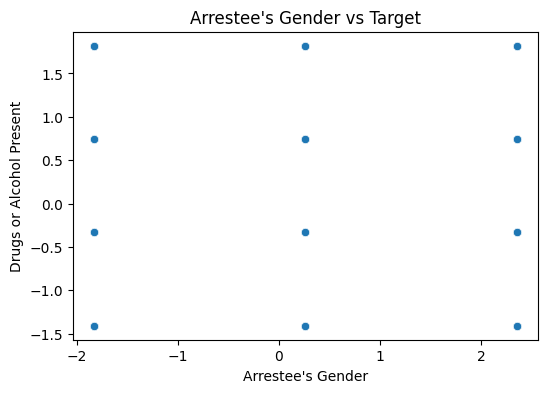

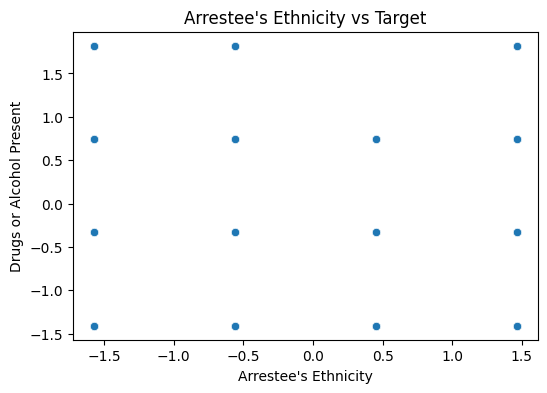

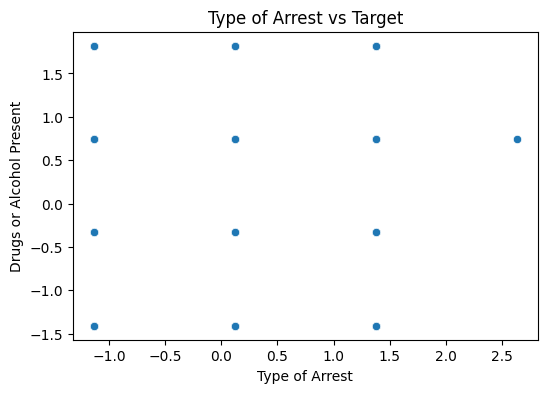

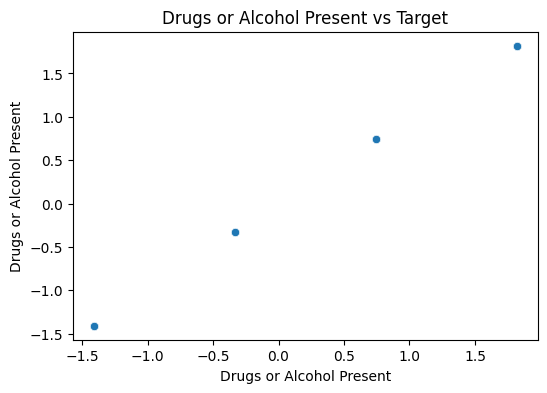

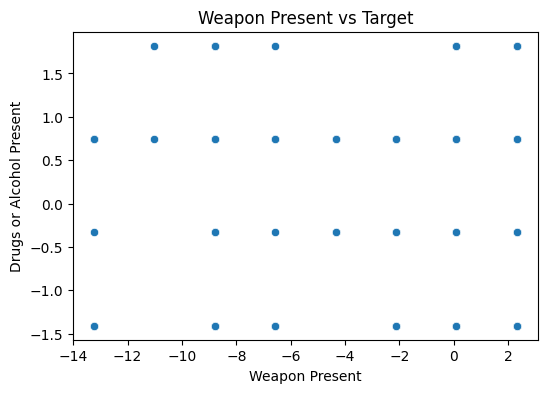

In [27]:
# Scatter plots of features vs target to visualize relationships
for feature in data:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=data["Drugs or Alcohol Present"])
    plt.title(f'{feature} vs Target')
    plt.show()

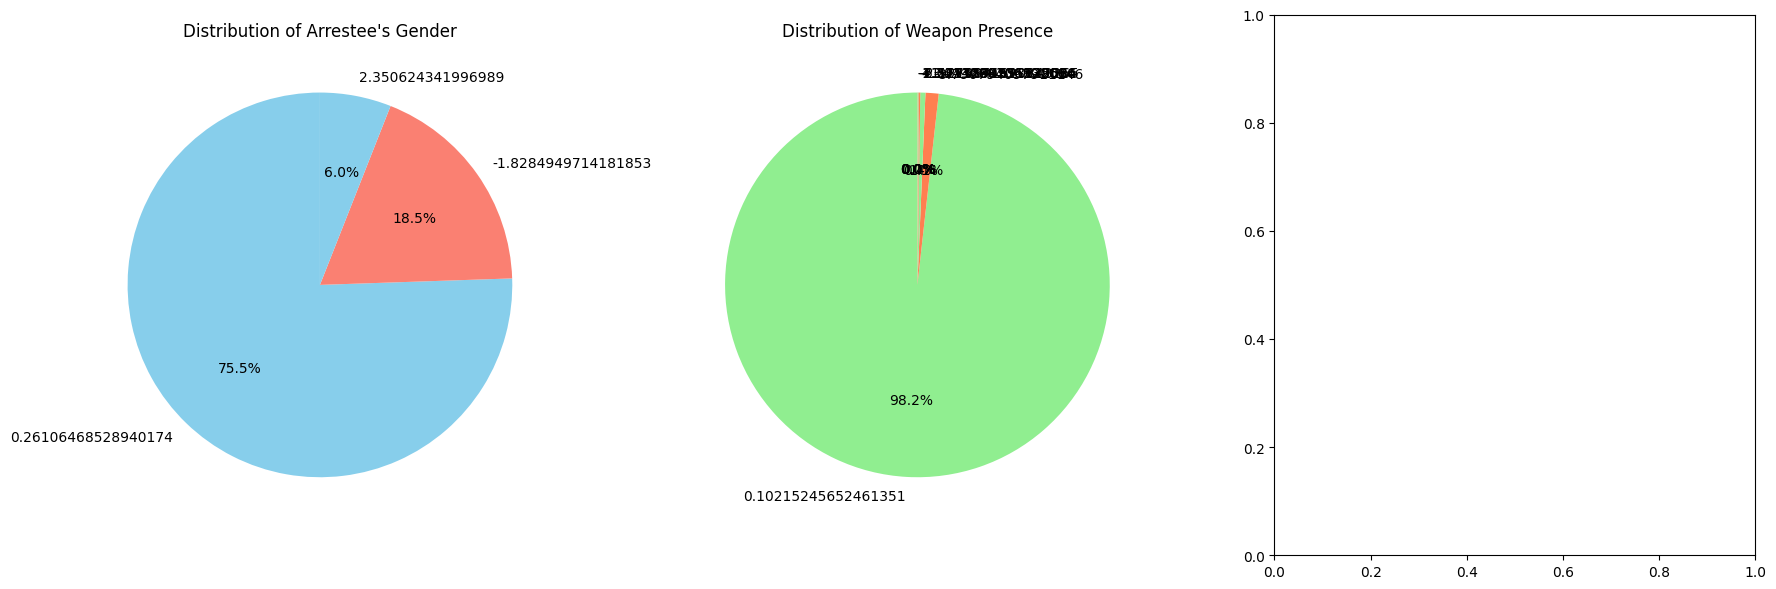

In [28]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each category
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'Arrestee's Gender'
gender_counts = data['Arrestee\'s Gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axes[0].set_title("Distribution of Arrestee's Gender")

# Plot for 'Weapon Present'
weapon_counts = data['Weapon Present'].value_counts()
axes[1].pie(weapon_counts, labels=weapon_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'coral'])
axes[1].set_title("Distribution of Weapon Presence")



# Display the pie charts
plt.tight_layout()
plt.show()


#Feature Selection

In [53]:
print(y.dtypes)  # Check data type
print(y.unique())  # Check unique values

# the values in the why is

float64
[ 0.74319851 -1.40917201 -0.33298675  1.81938377]


In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y = label_encoder.fit_transform(y)

In [57]:
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.model_selection import train_test_split

X = data.drop('Drugs or Alcohol Present', axis=1)  # Drop your target column
y = y # Your target column (the variable you're trying to predict)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
selector=SelectKBest(score_func=f_classif,k=5)

x_train_new = selector.fit_transform(X_train,y_train)
selected_features = X_train.columns[selector.get_support()]
print("selected Features",selected_features)

selected Features Index(['Time of Arrest', 'Primary Charge', 'Arrestee's Race',
       'Arrestee's Ethnicity', 'Type of Arrest'],
      dtype='object')


## Standardizing Features

In [58]:
# importing standard scaler for scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  # creating an object

# converting to standard scaler of the training data
X_train_scaled=scaler.fit_transform(x_train_new)

# converting the test data to standard scaling
X_test_scaled=scaler.transform(selector.transform(X_test))


## Try Different Models

In [59]:
# import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [67]:
# intialixe models

models={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier()

}

model_results={}

# Train models

for name,model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  y_pred_train=model.predict(X_train_scaled)

  # evaluvate accuracy for each

  accuracy=accuracy_score(y_test,y_pred) # accuracy betrween th ethe prediction and actual value
  accuracy_train=accuracy_score(y_train,y_pred_train)
  model_results[name]= accuracy
  print(f"{name} Accuracy: {accuracy:.2f} accuracy2: {accuracy_train}")




Logistic Regression Accuracy: 0.67 accuracy2: 0.6693422693266833
Decision Tree Accuracy: 0.62 accuracy2: 0.9879208229426434
Random Forest Accuracy: 0.68 accuracy2: 0.9879208229426434
SVM Accuracy: 0.68 accuracy2: 0.6826683291770573
XGBoost Accuracy: 0.72 accuracy2: 0.822786783042394


##. Handling Overfitting
### The difference between the training and testing accuracy is big it indicates that the model is overfitting so it is neccacary to create limitations and regulations in the model to reduce the overfitting for to create thge better model

In [86]:
# Decision Tree Classifier with regularization
model1 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model1.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model1.predict(X_train_scaled)
y_test_pred = model1.predict(X_test_scaled)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.7011377805486284
Test Accuracy: 0.7038653366583542


In [87]:
# Random forest Classifier with regularization
model2 = RandomForestClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model2.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model2.predict(X_train_scaled)
y_test_pred = model2.predict(X_test_scaled)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.7044887780548629
Test Accuracy: 0.7048004987531172


In [88]:
# SVC with regularization
model3 = SVC(kernel='linear', C=1.0)
model3.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model3.predict(X_train_scaled)
y_test_pred = model3.predict(X_test_scaled)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.6640430174563591
Test Accuracy: 0.6670822942643392


In [89]:
import xgboost as xgb

#Xg booster  with regularization
model4 = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    reg_alpha=0.1,  # L1 Regularization (Lasso)
    reg_lambda=0.1,  # L2 Regularization (Ridge)
    subsample=0.8,
    colsample_bytree=0.8)
model4.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = model4.predict(X_train_scaled)
y_test_pred = model4.predict(X_test_scaled)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.7549875311720698
Test Accuracy: 0.7319201995012469


##HyperParameter Tuning

In [84]:
model=RandomForestClassifier()
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


rf=RandomForestClassifier(random_state=42)
param_grid={
     'n_estimators' : [50,100,150,200],
     'max_depth' : [5,10,20,None],
     'min_samples_leaf' : [1,5,7,10],
     'min_samples_split': [2, 5, 10],  # Minimum samples to split a node

}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')


# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

print(f"best params {grid_search.best_params_}")
print(f"best score {grid_search.best_score_}")

best_rf=grid_search.best_estimator_
y_pred=best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

best params {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150}
best score 0.7250619940542791
              precision    recall  f1-score   support

           0       0.63      0.73      0.68       968
           1       0.50      0.03      0.06       348
           2       0.78      0.88      0.83      1831
           3       0.00      0.00      0.00        61

    accuracy                           0.72      3208
   macro avg       0.48      0.41      0.39      3208
weighted avg       0.69      0.72      0.68      3208



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report

# Assuming df is your dataframe
datas = df.copy()

# Split the data into features (X) and target (y)
X = datas.drop('Drugs or Alcohol Present', axis=1)  # Features
y = datas['Drugs or Alcohol Present']  # Target variable

# Encode the target variable if it's categorical
y = y.astype('category').cat.codes  # Automatically encodes categorical target

# Identify categorical columns for label encoding
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to the categorical features in X
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline with null value imputation, feature selection, scaling, and model training
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean for numerical columns
    ('feature_selection', SelectKBest(score_func=f_classif, k=5)),  # Select top 5 features
    ('scaler', StandardScaler()),  # Apply StandardScaler to the features
    ('model', RandomForestClassifier())  # The model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Feature selection using SelectKBest
selector = pipeline.named_steps['feature_selection']
selected_features = X_train.columns[selector.get_support()]

# Print the selected features
print("Selected Features:", selected_features)

# Evaluate the model
print(classification_report(y_test, y_pred))




Selected Features: Index(['Time of Arrest', 'Primary Charge', 'Arrestee's Race',
       'Arrestee's Ethnicity', 'Type of Arrest'],
      dtype='object')
              precision    recall  f1-score   support

          -1       0.09      0.05      0.06        61
           0       0.62      0.63      0.63       968
           1       0.24      0.17      0.20       348
           2       0.78      0.83      0.80      1831

    accuracy                           0.68      3208
   macro avg       0.43      0.42      0.42      3208
weighted avg       0.66      0.68      0.67      3208




#Conclusion:
##In this workflow, we have built a comprehensive pipeline to handle data preprocessing, feature selection, model training, and evaluation for a classification task. Here's a summary of the key steps and their purpose:

#Handling Missing Values:

##Missing data can significantly affect model performance. In this case, we used SimpleImputer to fill missing values with the mean (for numerical columns) or the most frequent value (for categorical columns). This prevents losing valuable data and helps maintain the integrity of the dataset.
#Label Encoding for Categorical Data:

##Categorical features were encoded using LabelEncoder to transform them into numerical values, making them compatible with machine learning algorithms.
#Feature Selection:

##We used SelectKBest to select the top 5 most important features based on statistical tests (ANOVA F-value in this case), helping reduce dimensionality and focus on the most influential variables.
#Standardization:

##StandardScaler was applied to standardize the data, ensuring that numerical features are scaled to a common range. This is particularly important for algorithms that are sensitive to feature scaling, such as logistic regression and support vector machines.
#Model Training:

##A RandomForestClassifier was used to train the model on the processed data. This model is chosen for its ability to handle both numerical and categorical features and its robustness against overfitting in many cases.
Evaluation:

##After training the model, we evaluated its performance using classification metrics like accuracy, precision, recall, and F1-score. This provided a clear understanding of how well the model performed on the test data, especially with respect to imbalanced class distributions.
#Key Observations:
##Feature Selection helped in identifying the most relevant variables, reducing complexity, and improving the interpretability of the model.
##Imputation of Missing Values ensured that no valuable data was lost, maintaining the integrity of the dataset.
##tandardization improved model performance by making sure all features contributed equally, particularly for models sensitive to feature scaling.
##The Random Forest Model is a strong choice for this task, but further tuning of hyperparameters and experimenting with other models could lead to better performance.
#Next Steps:
##Hyperparameter Tuning: Using techniques like GridSearchCV or RandomizedSearchCV, you could further optimize the RandomForest model or try other models such as Logistic Regression, Decision Trees, or Support Vector Machines.
##Advanced Feature Engineering: Investigating additional feature engineering techniques, such as interaction terms or polynomial features, might improve model performance.
##Model Comparison: It's always a good idea to compare multiple models and choose the best-performing one using cross-validation.
##By following this structured pipeline, the preprocessing and model evaluation steps are streamlined, making the entire workflow more efficient and reproducible.






